## Sci-Kit Documentation link 

https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqazZ6eHh6ZGY2VjdXZnNnRkVwQlRyckZjcmlQUXxBQ3Jtc0trVjlJYWlnQWpHUGdUV2ZLaFFyVGVYSlpsaUJ0QjNHemVGUkxtaS04a2M3Z3pXN05selQzN0pRM0xzeWtDdEEyVVN5VXZpdWd5QXFVNlNjbWNzU242c0xSMDl2TVgyYWdQMDBrNDhkX0ZURXJZR0dUaw&q=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fdocumentation.html&v=M9Itm95JzL0

## Load all required Libraries and Data

In [1]:
#This is how we access the data from a json file
import json

file_name = './data/sentiment/books_small.json'

with open(file_name) as f:
    for line in f:
        review = json.loads(line) #we load each line as json and store it
        print(review['reviewText'])
        # we extract only the required review text from the whole line
        print(review['overall'])
        # we print only the overall part from the review json object
        # overall is displayed as 4.0
        break

Da Silva takes the divine by storm with this unique new novel.  She develops a world unlike any others while keeping it firmly in the real world.  This is a very well written and entertaining novel.  I was quite impressed and intrigued by the way that this solid storyline was developed, bringing the readers right into the world of the story.  I was engaged throughout and definitely enjoyed my time spent reading it.I loved the character development in this novel.  Da Silva creates a cast of high school students who actually act like high school students.  I really appreciated the fact that none of them were thrown into situations far beyond their years, nor did they deal with events as if they had decades of life experience under their belts.  It was very refreshing and added to the realism and impact of the novel.  The friendships between the characters in this novel were also truly touching.Overall, this novel was fantastic.  I can&#8217;t wait to read more and to find out what happen

In [2]:
#Clean the code below by making it a class
class Sentiment: 
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"
#Above class is an enum class

class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
    
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score is 4 or 5
            return Sentiment.POSITIVE
        

In [3]:
#store all the reviews as a list
import json 

file_name = './data/sentiment/books_small.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append((review['reviewText'],review['overall']))
        #store both reviewText and overall rating as a tuple for each line
        #this tuple is appended into reviews list for each line
        
#print a random tuple to verify that the data is appended
print(reviews[5]) # - Entire tuple
print(reviews[5][0]) # - The review
print(reviews[5][1]) # - The overall raing

('Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!', 4.0)
Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!
4.0


In [4]:
#instead of appending each element as tuple 
#append Review class objects so its easier to access
#In this way the code is more clean
reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))
    
print(reviews[5].text)
print(reviews[5].score)
print(reviews[5].sentiment)

Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!
4.0
POSITIVE


## Prep Data

In [5]:
len(reviews)

1000

In [6]:
#split the data into training and testing data

### Import

In [7]:
from sklearn.model_selection import train_test_split

#use the func belowto split the data

training, test = train_test_split(reviews,test_size=0.33,random_state=42)

#test_size - 0.33 is testing data size and 0.67 is training
#random_state is used to get the same data every time and not random data

In [8]:
len(training)

670

In [9]:
len(test)

330

In [10]:
print(training[0].text)
print(training[0].sentiment)

Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
POSITIVE


In [11]:
#split the text and sentiment into 2 seperate lists
train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

print(train_x[0])
print(train_y[0])

Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
POSITIVE


### For  machine learning models we need to conver the text data into numerical data so that its easier to create models
### Best way to do this is to use BAGS OF WORDS in SKLEARN

## Bags of words Vectorization

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
train_x_vectors = vectorizer.fit_transform(train_x)

#the above func fit_tranform does 2 things fit the data and tranform
#another method is as shown below gives same output
#vectorizer.fit(train_x)
#train_x_vectors = vectorizer.tranform(train_x)

#the above functions convert our train_x data into numeric vectors
#for each sentence if there are occurances of selected words 
#we get a non zero value (indicating the number of occurances) and each sentence has a vector of its own

print(train_x[0])
print(train_x_vectors[0].toarray())
#it has nonzero value where ever we have an occurance of a useful word

#we have 2 sets of data now
#train_x_vectors for the text data 
#train_y for the review score

test_x_vectors = vectorizer.transform(test_x)


#we only transform and dont fit tranform in the case of test_x data


Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
[[0 0 0 ... 0 0 0]]


## Classification

### Linear SVM







In [13]:
#Linear SVM divides the dataset into 2 parts seperated by a linear line
#both sides contain data from 2 different classes and are present on the 2 sides
#the 2 classes are seperated using a single linear line hence the name linear SVM
# SVM - Support Vector Machine

In [14]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
#we use a linear classifier in this case

clf_svm.fit(train_x_vectors,train_y)

print(test_x[0])

clf_svm.predict(test_x_vectors[0])
#we use the predict method on the test data vectors to predict the correct class label
#as we can observe we get a positive prediction using the svm classifier
#we can compare the test_x[0] data and the output to find that it is a positive review
#so the classifier prediction is right and is positive for the first review in the test data


Every new Myke Cole book is better than the last, and this is no exception. If you haven't read the Shadow Ops series before start with Control Point, but go ahead and order Fortress Frontier and Breach Zone as well - you're going to want them.


array(['POSITIVE'], dtype='<U8')

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier


clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors,train_y)

clf_svm.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

### Naive Bayes

In [16]:
# from sklearn.naive_bayes import GaussianNB

# clf_gnb = GaussianNB()
# clf_gnb.fit(train_x_vectors,train_y)

# clf.gnb.predict(test_x_vectors[0])

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)

clf_log.predict(test_x_vectors[0])

C:\Users\adi2b\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['POSITIVE'], dtype='<U8')

## Evaluation

In [18]:
# Evaluating our models for all the data by checking the accuracy
# using svm
print(clf_svm.score(test_x_vectors,test_y))

0.8242424242424242


In [19]:
#using decision tree
print(clf_dec.score(test_x_vectors,test_y))

0.7303030303030303


In [20]:
#using gaussian NB
#print(clf_gnb.score(test_x_vectors,test_y))

In [21]:
#using log regression
print(clf_log.score(test_x_vectors,test_y))

0.8303030303030303


In [22]:
# F1 Scores
from sklearn.metrics import f1_score

In [23]:
# for SVM
f1_score(test_y,clf_svm.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL , Sentiment.NEGATIVE])

#f1 score means the weighted avg of precision and recall for the models
#as we can see for the svm model the f1 score is good for positive predictions 
#but it is clearly not good for the negative and neutral predictions
# F1 Score varies from 0 to 1 - Good to Bad

array([0.91319444, 0.21052632, 0.22222222])

In [24]:
# for decision tree
f1_score(test_y,clf_dec.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL , Sentiment.NEGATIVE])

# similar results

array([0.85198556, 0.11594203, 0.05405405])

In [25]:
# for GNB
#f1_score(test_y,clf_gnb.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL , Sentiment.NEGATIVE])

# it also probably give a similar result

In [26]:
# for log reg
f1_score(test_y,clf_log.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL , Sentiment.NEGATIVE])

#similar results

array([0.91370558, 0.12244898, 0.1       ])

## Improving our Model

In [27]:
print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))
print(train_y.count(Sentiment.NEUTRAL))

#majority in our training data is positive hence the accuracy is more for only positive data

552
47
71


In [28]:
import json 

file_name = './data/sentiment/books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append((review['reviewText'],review['overall']))

In [29]:
reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))
    
print(reviews[5].text)
print(reviews[5].score)
print(reviews[5].sentiment)

I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia's trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character's voice on a strong subject and making it so that other peoples story may be heard through Mia's.
5.0
POSITIVE


In [30]:
from sklearn.model_selection import train_test_split

#use the func belowto split the data

training, test = train_test_split(reviews,test_size=0.33,random_state=42)

#test_size - 0.33 is testing data size and 0.67 is training
#random_state is used to get the same data every time and not random data

In [31]:
train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

print(train_x[0])
print(train_y[0])

Olivia Hampton arrives at the Dunraven family home as cataloger of their extensive library. What she doesn't expect is a broken carriage wheel on the way. Nor a young girl whose mind is clearly gone, an old man in need of care himself (and doesn&#8217;t quite seem all there in Olivia&#8217;s opinion). Furthermore, Marion Dunraven, the only sane one of the bunch and the one Olivia is inexplicable drawn to, seems captive to everyone in the dusty old house. More importantly, she doesn't expect to fall in love with Dunraven's daughter Marion.Can Olivia truly believe the stories of sadness and death that surround the house, or are they all just local neighborhood rumor?Was that carriage trouble just a coincidence or a supernatural sign to stay away? If she remains, will the Castle&#8217;s dark shadows take Olivia down with them or will she and Marion long enough to declare their love?Patty G. Henderson has created an atmospheric and intriguing story in her Gothic tale. I found this to be an

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
train_x_vectors = vectorizer.fit_transform(train_x)

#We vectorize the new data now

print(train_x[0])
print(train_x_vectors[0].toarray())

#we have 2 sets of data now
#train_x_vectors for the text data 
#train_y for the review score

test_x_vectors = vectorizer.transform(test_x)


#we only transform and dont fit tranform in the case of test_x data

Olivia Hampton arrives at the Dunraven family home as cataloger of their extensive library. What she doesn't expect is a broken carriage wheel on the way. Nor a young girl whose mind is clearly gone, an old man in need of care himself (and doesn&#8217;t quite seem all there in Olivia&#8217;s opinion). Furthermore, Marion Dunraven, the only sane one of the bunch and the one Olivia is inexplicable drawn to, seems captive to everyone in the dusty old house. More importantly, she doesn't expect to fall in love with Dunraven's daughter Marion.Can Olivia truly believe the stories of sadness and death that surround the house, or are they all just local neighborhood rumor?Was that carriage trouble just a coincidence or a supernatural sign to stay away? If she remains, will the Castle&#8217;s dark shadows take Olivia down with them or will she and Marion long enough to declare their love?Patty G. Henderson has created an atmospheric and intriguing story in her Gothic tale. I found this to be an

In [33]:
print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))
print(train_y.count(Sentiment.NEUTRAL))

#as you can see now there is more data for all the sentiments

5611
436
653


In [34]:
import random

"""#Clean the code below by making it a class
class Sentiment: 
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"
#Above class is an enum class

class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
    
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score is 4 or 5
            return Sentiment.POSITIVE
"""
#Now we create another class called ReviewContainer
class ReviewContainer:
    def  __init__(self,reviews):
        self.reviews=reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
            
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
        
    def evenly_distribute(self):
        negative = list(filter(lambda x:x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x:x.sentiment == Sentiment.POSITIVE, self.reviews))
        neutral = list(filter(lambda x:x.sentiment == Sentiment.NEUTRAL, self.reviews))

        #we filter the data and store only the related data in each variable as indicated above using the filter method
        #Now we shrink the positive data to match the number of the negative data
        
        positive_shrunk = positive[0:len(negative)]
        self.reviews = negative+positive_shrunk
        
        #we change the self.reviews to the new shrunk data
        
        random.shuffle(self.reviews)
        #we shuffle the data so that both negative and positive data are mixed
        
        

In [35]:
from sklearn.model_selection import train_test_split

#use the func belowto split the data

training, test = train_test_split(reviews,test_size=0.33,random_state=42)

#test_size - 0.33 is testing data size and 0.67 is training
#random_state is used to get the same data every time and not random data

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
test_container.evenly_distribute()

len(train_container.reviews)
#we have the same amt of positive and negative data in our training data set

872

In [36]:
#Our data is now evenly distributed both train and test data

train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

print(test_y.count(Sentiment.POSITIVE))
print(test_y.count(Sentiment.NEGATIVE))

436
436
208
208


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
train_x_vectors = vectorizer.fit_transform(train_x)

#We vectorize the new data now

print(train_x[0])
print(train_x_vectors[0].toarray())

#we have 2 sets of data now
#train_x_vectors for the text data 
#train_y for the review score

test_x_vectors = vectorizer.transform(test_x)


#we only transform and dont fit tranform in the case of test_x data

Having a sun salutation as one item hardly counts as simple. Also simple implies for beginners,and there are some poses that should not be done with help such as plow. Also, there's some implication that a certain exercise will reduce fat in a certain area, and that 's just put together to sell the book. Bad choice.
[[0 0 0 ... 0 0 0]]


### Classification of the new data

In [38]:
#SVM
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors,train_y)

print(test_x[0])

clf_svm.predict(test_x_vectors[0])

If this novel is to represent contemporary times, our modern generation, then I am quite depressed.The author appears to understand much about the drug culture and finishing antique furniture, but the supposed 'who done it' looses steam.The book launches from an interesting plot idea in the first quarter of the book, but then drowns the reader with a deluge of useless detail that fails to evolve the plot, develop the characters, or entertain. I slogged through it waiting for a curious twist and turn, given the book's hype.... and found myself bored through large sections of the storyline.


array(['NEGATIVE'], dtype='<U8')

In [39]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier


clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors,train_y)

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [40]:
#GNB

# from sklearn.naive_bayes import GaussianNB

# clf_gnb = GaussianNB()
# clf_gnb.fit(train_x_vectors,train_y)

# clf.gnb.predict(test_x_vectors[0])

In [41]:
#Log Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)

clf_log.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

#### SCORES

In [42]:
print(clf_svm.score(test_x_vectors,test_y))
print(clf_dec.score(test_x_vectors,test_y))
#print(clf_gnb.score(test_x_vectors,test_y))
print(clf_log.score(test_x_vectors,test_y))

0.7980769230769231
0.6322115384615384
0.8149038461538461


In [43]:
#F1 Scores
from sklearn.metrics import f1_score
f1_score(test_y,clf_svm.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y,clf_dec.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y,clf_gnb.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y,clf_log.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])


array([0.8028169 , 0.79310345])

### Model in action

In [44]:
test_set = ['very fun', "Bad book do not buy" , 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

### Tfidf Vectorizer

In [45]:
#Count vectorizer weighs each word equally
#Rather than giving certain important words more value
#Hence we can use tfidf vectorizer to improve our model
#TFIDF - Term frequency inverse document frequency
#Important words are the once which occur more in a review like "Great" or "Bad"
#Words that occur more throughout the documents like "This or is" are given less importance

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = TfidfVectorizer() 
train_x_vectors = vectorizer.fit_transform(train_x)

#We vectorize the new data now

print(train_x[0])
print(train_x_vectors[0].toarray())

#we have 2 sets of data now
#train_x_vectors for the text data 
#train_y for the review score

test_x_vectors = vectorizer.transform(test_x)


#we only transform and dont fit tranform in the case of test_x data

Having a sun salutation as one item hardly counts as simple. Also simple implies for beginners,and there are some poses that should not be done with help such as plow. Also, there's some implication that a certain exercise will reduce fat in a certain area, and that 's just put together to sell the book. Bad choice.
[[0. 0. 0. ... 0. 0. 0.]]


In [47]:
#Classification using the new vectorizer
#SVM
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors,train_y)

print(test_x[0])

clf_svm.predict(test_x_vectors[0])

If this novel is to represent contemporary times, our modern generation, then I am quite depressed.The author appears to understand much about the drug culture and finishing antique furniture, but the supposed 'who done it' looses steam.The book launches from an interesting plot idea in the first quarter of the book, but then drowns the reader with a deluge of useless detail that fails to evolve the plot, develop the characters, or entertain. I slogged through it waiting for a curious twist and turn, given the book's hype.... and found myself bored through large sections of the storyline.


array(['NEGATIVE'], dtype='<U8')

In [48]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier


clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors,train_y)

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [49]:
#GNB

# from sklearn.naive_bayes import GaussianNB

# clf_gnb = GaussianNB()
# clf_gnb.fit(train_x_vectors,train_y)

# clf.gnb.predict(test_x_vectors[0])

In [50]:
#Log Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)

clf_log.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [51]:
#Evaluation of the newly built models
print(clf_svm.score(test_x_vectors,test_y))
print(clf_dec.score(test_x_vectors,test_y))
#print(clf_gnb.score(test_x_vectors,test_y))
print(clf_log.score(test_x_vectors,test_y))

0.8076923076923077
0.6658653846153846
0.8052884615384616


In [52]:
#F1 Scores
from sklearn.metrics import f1_score
f1_score(test_y,clf_svm.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y,clf_dec.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y,clf_gnb.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y,clf_log.predict(test_x_vectors), average=None , labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.80582524, 0.80952381])

## Tuning our model (with Grid Search)

In [53]:
from sklearn.model_selection import GridSearchCV

#Grid search cv tunes our model to improve the values
#or parameters we pass to our model
#like c value or kernel that we pass to our svc model

parameters = {'kernel':('linear','rbf'),'C':(1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(train_x_vectors,train_y)

#svc is the model that we want to tune
#parameters are the ones from which we want to select the best possible values
#cv stand for cross validation ie. the number of times the data is split and cross validated


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [54]:
print(clf.score(test_x_vectors,test_y))

#did not affect much

0.8100961538461539


In [55]:
# We could improve the NLP to improve our model

## Saving Model

In [56]:
import pickle

with open('./models/sentiment_classifier.pkl','wb') as f:
    pickle.dump(clf_svm,f)
    
#wb stands for write-buffer

In [57]:
#we can load in our model

### load model

In [58]:
#we cant run our classifier directly as it wont be defined

In [59]:
with open('./models/sentiment_classifier.pkl','rb') as f:
    loaded_clf = pickle.load(f) 
    
#rb stands for read-buffer

In [60]:
print(test_x[0])
loaded_clf.predict(test_x_vectors[0])
#we can directly predict rather than implementing the whole thing again

If this novel is to represent contemporary times, our modern generation, then I am quite depressed.The author appears to understand much about the drug culture and finishing antique furniture, but the supposed 'who done it' looses steam.The book launches from an interesting plot idea in the first quarter of the book, but then drowns the reader with a deluge of useless detail that fails to evolve the plot, develop the characters, or entertain. I slogged through it waiting for a curious twist and turn, given the book's hype.... and found myself bored through large sections of the storyline.


array(['NEGATIVE'], dtype='<U8')

In [61]:
#go through another model - category classifier in github
#from https://github.com/keithgalli/sklearn

# Category classifier

In [62]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score

import json

### Data Class

In [63]:
class Category:
    ELECTRONICS = "ELECTRONICS"
    BOOKS = "BOOKS"
    CLOTHING = "CLOTHING"
    GROCERY = "GROCERY"
    PATIO = "PATIO"
    
class Sentiment:
    POSITIVE = "POSITIVE"
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"

class Review:
    def __init__(self, category, text, score):
        self.category = category
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: # Amazon review is a 4 or 5
            return Sentiment.POSITIVE
        
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_x(self, vectorizer):
        return vectorizer.transform(self.get_text())
    
    def get_y(self):
        return [x.sentiment for x in self.reviews]
    
    def get_category(self):
        return [x.category for x in self.reviews]
    
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        print(len(positive_shrunk))
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        print(self.reviews[0])
        


### Load in Data

In [64]:
file_names = ['./data/category/Electronics_small.json', './data/category/Books_small.json', './data/category/Clothing_small.json', './data/category/Grocery_small.json', './data/category/Patio_small.json']
file_categories = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.GROCERY, Category.PATIO]

reviews = []
for i in range(len(file_names)):
    file_name = file_names[i]
    category = file_categories[i]
    with open(file_name) as f:
        for line in f:
            review_json = json.loads(line)
            review = Review(category, review_json['reviewText'], review_json['overall'])
            reviews.append(review)

## Data Prep

In [65]:
train, test = train_test_split(reviews, test_size = 0.33, random_state=42)

train_container = ReviewContainer(train)
#train_container.evenly_distribute()
test_container = ReviewContainer(test)
#test_container.evenly_distribute()

corpus = train_container.get_text()
# vectorizer = CountVectorizer(binary=True)
# vectorizer.fit(corpus)
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

train_x = train_container.get_x(vectorizer)
train_y = train_container.get_category()

test_x = test_container.get_x(vectorizer)
test_y = test_container.get_category()

## Classification

In [66]:
from sklearn import svm

clf = svm.SVC(C=16, kernel='linear', gamma='auto')
clf.fit(train_x, train_y)

SVC(C=16, gamma='auto', kernel='linear')

In [67]:
test_set = ['great for my wedding', "loved it in my garden", 'good computer']
new_test = vectorizer.transform(test_set)

clf.predict(new_test)

array(['CLOTHING', 'PATIO', 'ELECTRONICS'], dtype='<U11')

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# print(train_x)
gnb.fit(train_x.todense(),train_y)
gnb.score(test_x.todense(),test_y)

C:\Users\adi2b\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\adi2b\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.8109090909090909

## Performance

In [69]:
y_pred = clf.predict(test_x)

f1_score(test_y, y_pred, average=None)

#for i in range(len(y_pred)):
#     print(y_pred[i], test_y[i])

array([0.95111111, 0.89323308, 0.88567294, 0.89891135, 0.91693291])

## Tuning with grid search

In [70]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1,8,16,32]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 8, 16, 32], 'kernel': ('linear', 'rbf')})

In [71]:
clf.score(test_x, test_y)

0.9187878787878788

## Pickle Model

### Saving Classifier

In [72]:
import pickle

with open('./models/category_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)
    
with open('./models/category_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
# we can save and load the Vectorizer so that new test data can be vectorized very easily

### Load Classifier

In [76]:
import pickle 

with open('./models/category_classifier.pkl', 'rb') as f:
    clf = pickle.load(f)

with open('./models/category_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
    
#we load both the model and vectorizer

In [74]:
test_set = ['very quick speeds', "loved the necklace", 'bad']
new_test = vectorizer.transform(test_set)

clf.predict(new_test)

array(['ELECTRONICS', 'CLOTHING', 'GROCERY'], dtype='<U11')

## Confusion Matrix

<AxesSubplot:>

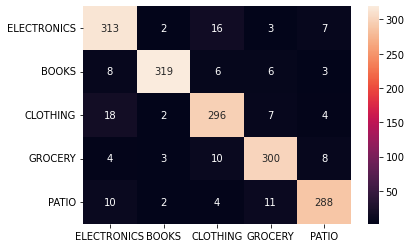

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf.predict(test_x)

labels = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.GROCERY, Category.PATIO]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')